In [16]:
import numpy as np
import pandas as pd 

from pandas_datareader import data as web

import warnings
warnings.filterwarnings('ignore')

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [7]:
japan_rates = pd.read_csv('japan_rates.csv')
japan_rates.head()

,DATE,INTDSRJPM193N
0,1953-01-01,5.84
1,1953-02-01,5.84
2,1953-03-01,5.84
3,1953-04-01,5.84
4,1953-05-01,5.84


In [8]:
japan_rates = japan_rates.rename(columns={'INTDSRJPM193N':'Interest_rate'})

In [9]:
japan_rates['DATE'] = pd.to_datetime(japan_rates['DATE'])

In [10]:
japan_rates.dtypes

DATE             datetime64[ns]
Interest_rate           float64
dtype: object

In [11]:
japan_rates = japan_rates.set_index('DATE')

Text(0.5, 0, 'Year')

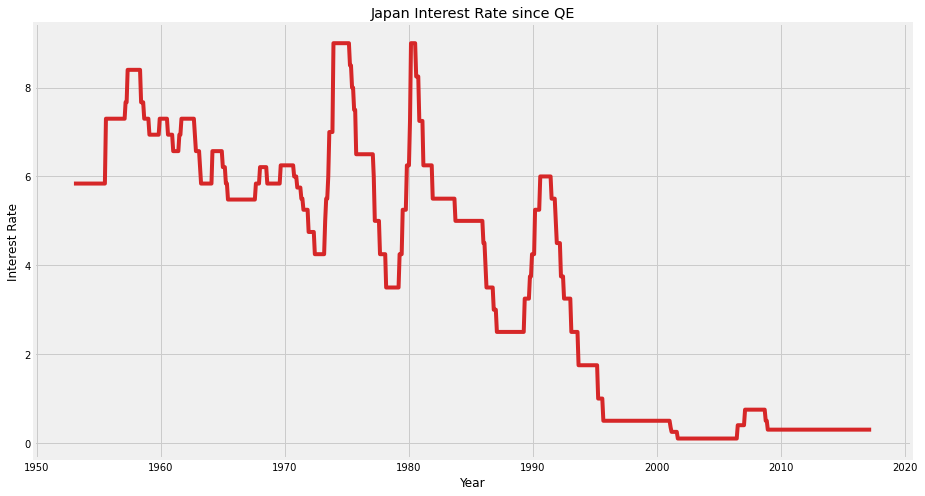

In [32]:
f, ax = plt.subplots(figsize=(14,8))

ax.plot(japan_rates['Interest_rate'], color='tab:red')
ax.set_title('Japan Interest Rate since QE')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Year')

In [19]:
nikkei = web.DataReader('^N225','yahoo', start = '01-01-1950')
nikkei

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,0.0,1257.719971
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,0.0,1263.989990
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,0.0,1274.270020
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,0.0,1286.430054
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,0.0,1288.540039
...,...,...,...,...,...,...
2021-03-11,29255.419922,28995.330078,29033.919922,29211.640625,78500000.0,29211.640625
2021-03-12,29744.320312,29210.400391,29287.740234,29717.830078,96600000.0,29717.830078
2021-03-15,29884.730469,29670.310547,29804.500000,29766.970703,94100000.0,29766.970703


Text(0.5, 0, 'Year')

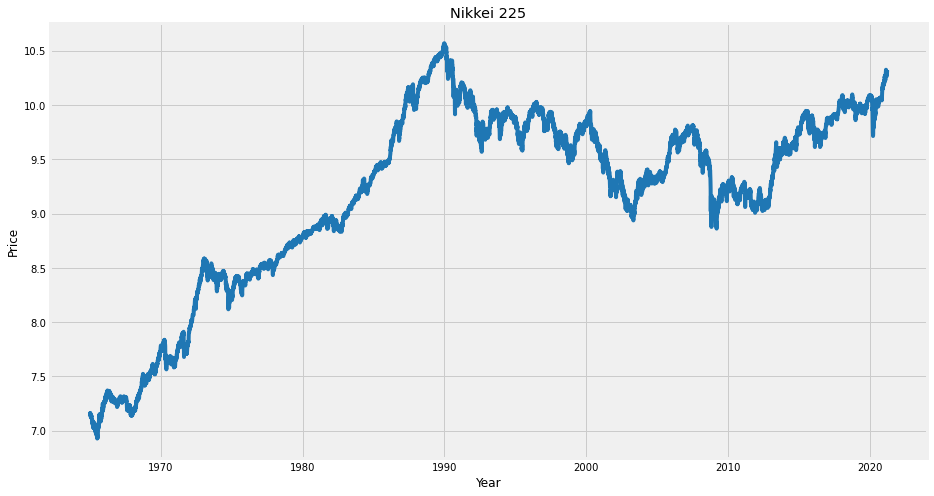

In [33]:
f, ax = plt.subplots(figsize=(14,8))

ax.plot(nikkei['Close'].apply(np.log), color='tab:blue')
ax.set_title('Nikkei 225')
ax.set_ylabel('Price')
ax.set_xlabel('Year')

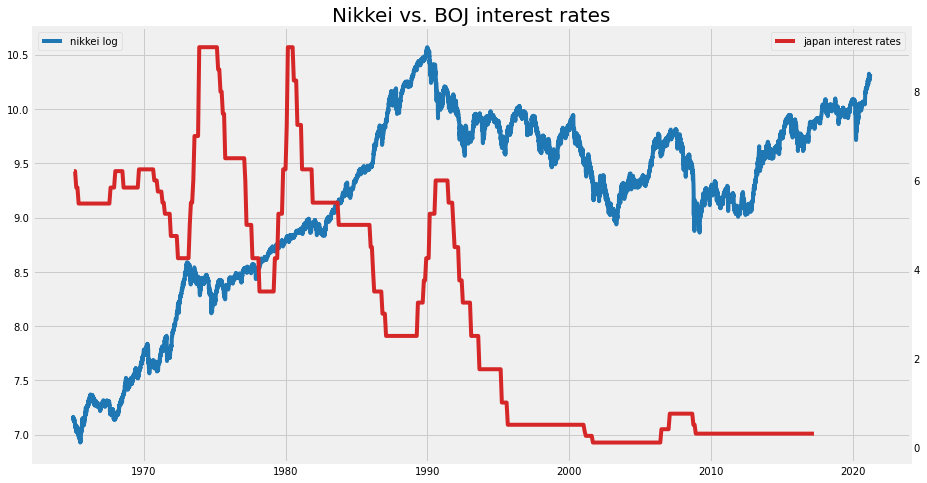

In [54]:
f, ax = plt.subplots(figsize=(14,8))

ax.plot(nikkei['Close'].apply(np.log), color='tab:blue', label='nikkei log')
ax.set_title('Nikkei vs. BOJ interest rates', fontsize=20)
ax.legend(loc='upper left')
ax = ax.twinx()

ax.plot(japan_rates['Interest_rate'].loc['1965-01-05':], color ='tab:red', label='japan interest rates')
ax.legend(loc='upper right')
ax.grid(False)

In [34]:
us_rates = pd.read_csv('us_rates.csv')
us_rates

,DATE,INTDSRUSM193N
0,1950-01-01,1.50
1,1950-02-01,1.50
2,1950-03-01,1.50
3,1950-04-01,1.50
4,1950-05-01,1.50
...,...,...
848,2020-09-01,0.25
849,2020-10-01,0.25
850,2020-11-01,0.25
851,2020-12-01,0.25


In [35]:
us_rates = us_rates.rename(columns={'INTDSRUSM193N':'Interest_rate'})

In [36]:
us_rates['DATE'] = pd.to_datetime(us_rates['DATE'])

In [37]:
us_rates = us_rates.set_index('DATE')

Text(0.5, 0, 'Year')

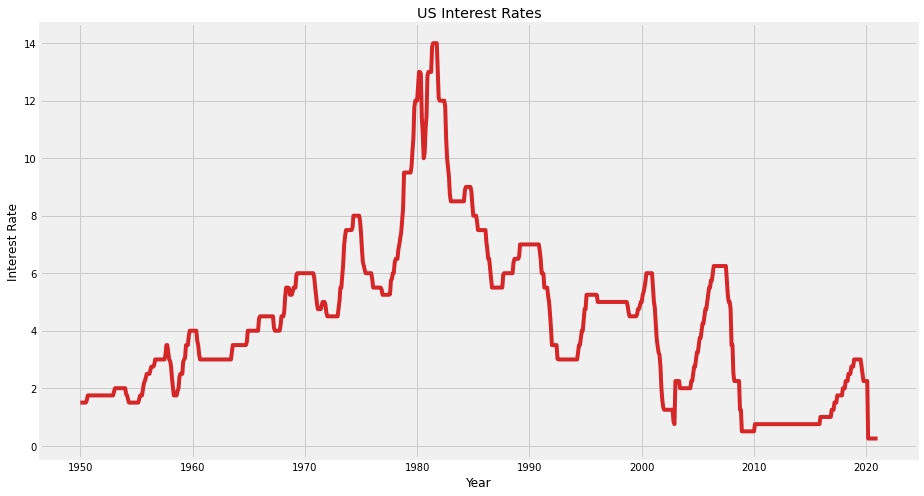

In [38]:
f, ax = plt.subplots(figsize=(14,8))

ax.plot(us_rates['Interest_rate'], color='tab:red')
ax.set_title('US Interest Rates')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Year')

In [39]:
sp500 = web.DataReader('^GSPC','yahoo', start = '01-01-1950')
sp500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.850000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.930000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.980000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.080000
...,...,...,...,...,...,...
2021-03-11,3960.270020,3915.540039,3915.540039,3939.340088,5300010000,3939.340088
2021-03-12,3944.989990,3915.209961,3924.520020,3943.340088,4469240000,3943.340088
2021-03-15,3970.080078,3923.540039,3942.959961,3968.939941,4882190000,3968.939941


Text(0.5, 0, 'Year')

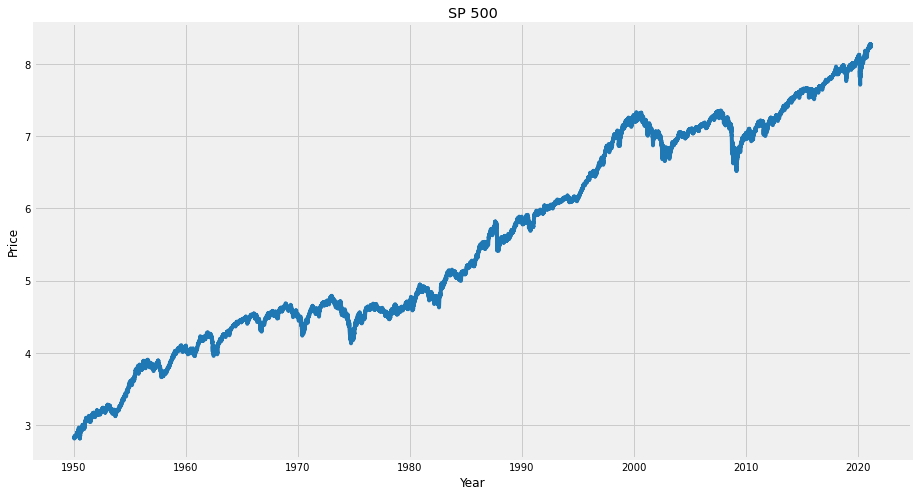

In [40]:
f, ax = plt.subplots(figsize=(14,8))

ax.plot(sp500['Close'].apply(np.log), color='tab:blue')
ax.set_title('SP 500')
ax.set_ylabel('Price')
ax.set_xlabel('Year')

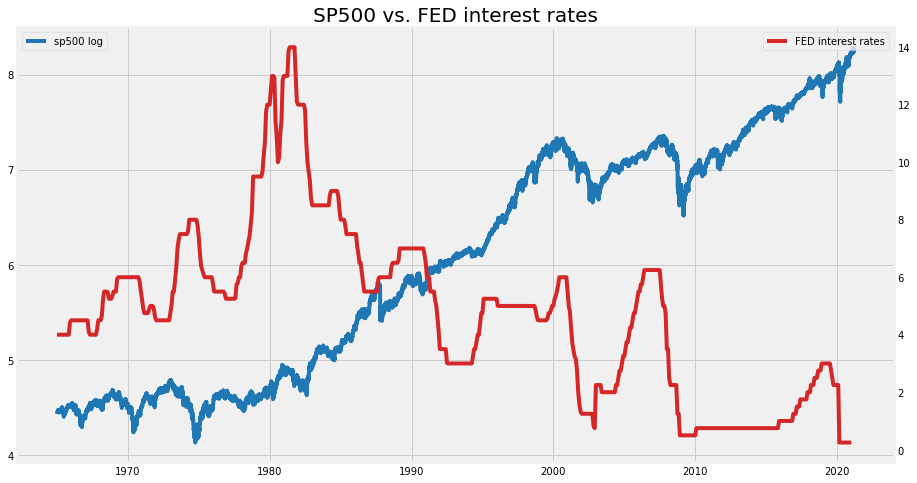

In [62]:
f, ax = plt.subplots(figsize=(14,8))

ax.plot(sp500['Close'].loc['1965-01-01':].apply(np.log), color='tab:blue', label='sp500 log')
ax.set_title('SP500 vs. FED interest rates', fontsize=20)
plt.legend()

ax = ax.twinx()

ax.plot(us_rates['Interest_rate'].loc['1965-01-01':], color ='tab:red', label='FED interest rates')
ax.grid(False)
plt.legend()